In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
import lidg

In [2]:
# --- make instance ---
S0 = lidg.linear_span.LinearSpan("S0")

# --- read a text file or pandas DataFrame ---
S0.read("database/binary_alloy/alloy.dat")
S0.show()

# --- divide a target vector y ---
S0.set_y("M")

# --- add a constant vector "const"---
S0.add_const()
S0.show()

# --- change descriptor labels ---
S0.change_labels("x")

.read:  as a text file (table)
  .label_check

.show: S0 ( 8 )
  ['M', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    1  M
    2  x
    3  MA
    4  ZA
    5  MB
    6  ZB
    7  MAB
    8  MBA

.set_y:  
  S0.y     <---  'M'  in  S0 ( 8 )
  S0 ( 8 )   -   'M' 
  S0 ( 7 )

.add_const:  
  S0 ( 7 )   +   const ( 1 ) 
  S0 ( 8 )

.show: S0 ( 8 )
  ['const', 'x', 'MA', 'ZA', 'MB', 'ZB', 'MAB', 'MBA']
    1  const
    2  x
    3  MA
    4  ZA
    5  MB
    6  ZB
    7  MAB
    8  MBA

.change_labels: from x0
    1   x0   <---   const
    2   x1   <---   x
    3   x2   <---   MA
    4   x3   <---   ZA
    5   x4   <---   MB
    6   x5   <---   ZB
    7   x6   <---   MAB
    8   x7   <---   MBA
.save:  
  S0 ( 8 )  --->  S0_save ( 8 )
  S0 ( 8 )         S0_save ( 8 )



In [3]:
# --- divide descriptors which has a same physical dimention ---
S0_sub = S0.sub(["x2","x3","x4","x5","x6","x7"],"S0_sub")
S0_sub.show()

# --- generate first order descriptors by basic operations (["r","a","b","r+","a+","b+","r-","a-","b-"])
S0_gen_bo = S0_sub.gen_bo(["a","a+","a-"],"S0_gen_bo")
S0_gen_bo.show()

.sub:  ['x2', 'x3', 'x4', 'x5', 'x6', 'x7']
  S0_sub ( 6 )  <---  S0 ( 6 )  in  S0 ( 8 )

.show: S0_sub ( 6 )
  ['x2', 'x3', 'x4', 'x5', 'x6', 'x7']
    1  x2      (  =  MA  )
    2  x3      (  =  ZA  )
    3  x4      (  =  MB  )
    4  x5      (  =  ZB  )
    5  x6      (  =  MAB  )
    6  x7      (  =  MBA  )

Descriptor generation by basic operations:
  'a' : n = 6
  'a+' : 6C2 = 15
  'a-' : 6C2 = 15
  # of generated new descriptors: 36
.gen_bo:  ['a', 'a+', 'a-']
  S0_gen_bo ( 36 )  <---  S0_sub ( 6 )

.show: S0_gen_bo ( 36 )
  ['a(x2)', 'a(x3)', 'a(x4)', 'a(x5)', 'a(x6)', 'a(x7)', 'a(x2+x3)', 'a(x2+x4)', 'a(x2+x5)', 'a(x2+x6)', 'a(x2+x7)', 'a(x3+x4)', 'a(x3+x5)', 'a(x3+x6)', 'a(x3+x7)', 'a(x4+x5)', 'a(x4+x6)', 'a(x4+x7)', 'a(x5+x6)', 'a(x5+x7)', 'a(x6+x7)', 'a(x2-x3)', 'a(x2-x4)', 'a(x2-x5)', 'a(x2-x6)', 'a(x2-x7)', 'a(x3-x4)', 'a(x3-x5)', 'a(x3-x6)', 'a(x3-x7)', 'a(x4-x5)', 'a(x4-x6)', 'a(x4-x7)', 'a(x5-x6)', 'a(x5-x7)', 'a(x6-x7)']
    1  a(x2)
    2  a(x3)
    3  a(x4)
    4  a

In [4]:
# --- S1 = S0 + S0_gen_bo --- 
S1 = S0.join(S0_gen_bo,"S1")
S1.show()

.join:  
  S1 (44)  <---  S0 ( 8 )   +   S0_gen_bo ( 36 )

.show: S1 ( 44 )
  ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'a(x2)', 'a(x3)', 'a(x4)', 'a(x5)', 'a(x6)', 'a(x7)', 'a(x2+x3)', 'a(x2+x4)', 'a(x2+x5)', 'a(x2+x6)', 'a(x2+x7)', 'a(x3+x4)', 'a(x3+x5)', 'a(x3+x6)', 'a(x3+x7)', 'a(x4+x5)', 'a(x4+x6)', 'a(x4+x7)', 'a(x5+x6)', 'a(x5+x7)', 'a(x6+x7)', 'a(x2-x3)', 'a(x2-x4)', 'a(x2-x5)', 'a(x2-x6)', 'a(x2-x7)', 'a(x3-x4)', 'a(x3-x5)', 'a(x3-x6)', 'a(x3-x7)', 'a(x4-x5)', 'a(x4-x6)', 'a(x4-x7)', 'a(x5-x6)', 'a(x5-x7)', 'a(x6-x7)']
    1  x0      (  =  const  )
    2  x1      (  =  x  )
    3  x2      (  =  MA  )
    4  x3      (  =  ZA  )
    5  x4      (  =  MB  )
    6  x5      (  =  ZB  )
    7  x6      (  =  MAB  )
    8  x7      (  =  MBA  )
    9  a(x2)
   10  a(x3)
   11  a(x4)
   12  a(x5)
   13  a(x6)
   14  a(x7)
   15  a(x2+x3)
   16  a(x2+x4)
   17  a(x2+x5)
   18  a(x2+x6)
   19  a(x2+x7)
   20  a(x3+x4)
   21  a(x3+x5)
   22  a(x3+x6)
   23  a(x3+x7)
   24  a(x4+x5)
 

In [5]:
# --- find linearly dependent descriptors (multicollinearities: MCL) ---
S1.lid()

Find and remove multicollinearities:
  normalize = False
  coefficients for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 44)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 1.4589124023799135e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 10
                   rk_rref = 10
# of non-trivial solutions: 34 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 6, 33, 17, 28, 40, 35, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43]
Space index: [ extra basis, [ basis ] ]
[4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 36, 37, 38, 39, 41, 42, 43, [0, 1, 2, 3, 6, 33, 17, 28, 40, 35]]

The form of multi-correlated descriptors
1 : x4 = (2.26)x0
2 : x5 = (8.0)x0
3 : x7 

S_lid ( 10 ) : ['x0', 'x1', 'x2', 'x3', 'x6', 'a(x2-x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)']

In [6]:
# --- remove trivial (easy to understand) MCL relationships ---

rem_list = ['a(x3)','a(x2)']
rem_list.extend(['x4', 'x5', 'a(x4)', 'a(x5)', 'a(x4+x5)', 'a(x4-x5)'])
rem_list.extend(['a(x3+x6)', 'a(x3-x6)'])
rem_list.extend(['a(x2+x3)', 'a(x2-x3)'])
rem_list.extend(['a(x3+x4)', 'a(x3+x5)', 'a(x3-x4)'])
rem_list.extend(['a(x4+x6)', 'a(x5+x6)', 'a(x4-x6)', 'a(x5-x6)'])
rem_list.extend(['a(x2+x4)', 'a(x2+x5)', 'a(x2-x4)', 'a(x2-x5)'])

rem_list.extend(['a(x2+x7)'])
rem_list.extend(['a(x2-x6)'])
rem_list.extend(['a(x3+x7)', 'a(x3-x7)'])
rem_list.extend(['a(x4+x7)', 'a(x5+x7)', 'a(x5-x7)'])

S1.remove(rem_list)
S1.show()
S1.lid()

.remove:  None
  S1 ( 44 )   -   S1 ( 30 )
  S1 ( 14 )

.show: S1 ( 14 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x7)', 'a(x2+x6)', 'a(x6+x7)', 'a(x2-x7)', 'a(x3-x5)', 'a(x4-x7)', 'a(x6-x7)']
    1  x0      (  =  const  )
    2  x1      (  =  x  )
    3  x2      (  =  MA  )
    4  x3      (  =  ZA  )
    5  x6      (  =  MAB  )
    6  x7      (  =  MBA  )
    7  a(x6)
    8  a(x7)
    9  a(x2+x6)
   10  a(x6+x7)
   11  a(x2-x7)
   12  a(x3-x5)
   13  a(x4-x7)
   14  a(x6-x7)

Find and remove multicollinearities:
  normalize = False
  coefficients for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 14)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 1.3877787807814457e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 10
                   rk_rref = 10
# of non-trivial solutions: 4 (

S_lid ( 10 ) : ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)']

In [7]:
# --- check hypervolumes of spans for all combination you defined ---
S1.volume_comb(['x0', 'x2', 'x3', 'x6', 'x7', 'a(x6)','a(x7)','a(x2+x6)'],['a(x2-x7)', 'a(x6-x7)','a(x6+x7)', 'a(x4-x7)', 'a(x3-x5)'],1)
# --- check correlation between y and all descriptors ---
S1.xty()

   index        Used                                    Unused        Volume
0      2  [a(x6+x7)]  [a(x2-x7), a(x6-x7), a(x4-x7), a(x3-x5)]  2.431384e-07
1      4  [a(x3-x5)]  [a(x2-x7), a(x6-x7), a(x6+x7), a(x4-x7)]  6.671216e-08
2      3  [a(x4-x7)]  [a(x2-x7), a(x6-x7), a(x6+x7), a(x3-x5)]  4.540304e-08
3      1  [a(x6-x7)]  [a(x2-x7), a(x6+x7), a(x4-x7), a(x3-x5)]  4.403741e-09
4      0  [a(x2-x7)]  [a(x6-x7), a(x6+x7), a(x4-x7), a(x3-x5)]  1.977179e-13 

       Label        xty      |xty|
0         x1  13.441936  13.441936
1         x3  12.030288  12.030288
2         x0  11.976714  11.976714
3      a(x6)  11.427694  11.427694
4      a(x7)  11.357493  11.357493
5         x7  11.352735  11.352735
6   a(x2+x6)  11.051114  11.051114
7   a(x6+x7)  10.795911  10.795911
8   a(x2-x7)  10.169067  10.169067
9   a(x6-x7)   9.987573   9.987573
10        x2   9.796545   9.796545
11  a(x3-x5)   9.239591   9.239591
12  a(x4-x7)   7.167984   7.167984
13        x6  -0.190994   0.190994 



In [8]:
S1.remove(['a(x2-x7)', 'a(x6-x7)', 'a(x4-x7)', 'a(x3-x5)'])
S1_lid = S1.lid("S1_lid")

.remove:  None
  S1 ( 14 )   -   S1 ( 4 )
  S1 ( 10 )

Find and remove multicollinearities:
  normalize = False
  coefficients for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 10)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a full rank matrix ( pivot ( = 0.00023295860776286614)  >  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 10
                   rk_rref = 10
# of non-trivial solutions: 0 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 4, 5, 6, 9, 8, 7]
Space index: [ extra basis, [ basis ] ]
[[0, 1, 2, 3, 4, 5, 6, 9, 8, 7]]

The form of multi-correlated descriptors

Subspace list: 0

Temporal linearly independent descriptors (LIDs): 10
['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x2+x6)', 'a(x7)']

.lid:  
  S1_lid ( 10 )  <---  S1 ( 10 )



Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  6.026001
  mse =  0.060869
  rmse =  0.246716
  R2 =  0.906386
  eq2 =  7.552861
  mseq =  0.076292
  rmseq =  0.276209
  Q2 =  0.882666

  TR2, TQ2, AIC =  0.971003,   0.963655,   23.845240

   index     Label         b       |b|    p_val  -log10(p)       G2      TRi2
0     10     a(x7)  11.75757  11.75757  0.60822    0.21594  0.00296  1.000000
1      6        x7 -11.62782  11.62782  0.61072    0.21416  0.00292  1.000000
2      7     a(x6)   0.18340   0.18340  0.69785    0.15624  0.00170  0.997763
3      9  a(x2+x6)  -0.05267   0.05267  0.80805    0.09256  0.00067  0.993737
4      5        x6   0.14189   0.14189  0.58067    0.23607  0.00344  0.992426
5      8  a(x6+x7)  -0.07323   0.07323  0.53428    0.27223  0.00435  0.989970
6      1        x0  -0.37095   0.37095  0.07195    1.14298  0.03593  0.983517
7      4        x3   0.03765   0.03765  0.04277    1.36886  0.04532  

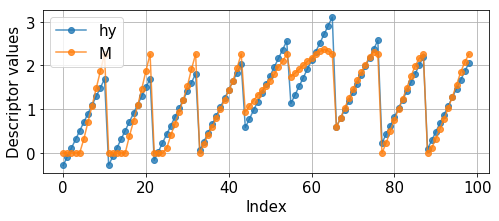

Constant descriptors ['x0'] are ignored in rij calculation.
          i         j       rij      rij2
0        x7     a(x7)  0.999997  0.999995
1        x6  a(x6+x7)  0.828654  0.686668
2        x2  a(x2+x6)  0.798125  0.637003
3     a(x6)  a(x2+x6)  0.769225  0.591706
4  a(x6+x7)  a(x2+x6)  0.696992  0.485798
5  a(x6+x7)     a(x7)  0.692182  0.479116
6        x7  a(x6+x7)  0.691738  0.478501
7        x2     a(x6)  0.677748  0.459343
8        x2  a(x6+x7)  0.675870  0.456801
9        x2     a(x7)  0.651103  0.423935

          i         j       nij      nij2
0        x7     a(x7)  0.999998  0.999997
1        x0        x3  0.926543  0.858482
2     a(x6)  a(x2+x6)  0.903287  0.815928
3  a(x6+x7)  a(x2+x6)  0.853011  0.727629
4  a(x6+x7)     a(x7)  0.850180  0.722805
5        x7  a(x6+x7)  0.849873  0.722284
6        x2  a(x2+x6)  0.846639  0.716798
7        x0        x1  0.845154  0.714286
8        x0     a(x6)  0.834343  0.696128
9     a(x6)     a(x7)  0.826315  0.682796

          i   

In [9]:
# --- linear regression by OLS ---
# --- check the regression accuracy ---
# --- find strong near multicollinearities (NMCL) by "TRi2" ( ~ 1.0) ---
S1_lid.project("TRi2")
S1_lid.plot(S1_lid.y,S1_lid.hy)

# --- check pair correlatinos ---
S1_lid.corr(10)
S1_lid.gik("x7")


# Strong near multicollinearlity(NMCL) TRi2 = 1.00 at x7 and a(x7) can be found.
# remove x7 or a(x7) to kill the strong NMCL

.remove:  a(x7)
  S1_lid ( 10 )   -   S1_lid ( 1 )
  S1_lid ( 9 )

Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  6.043920
  mse =  0.061050
  rmse =  0.247082
  R2 =  0.906107
  eq2 =  7.331493
  mseq =  0.074055
  rmseq =  0.272131
  Q2 =  0.886105

  TR2, TQ2, AIC =  0.970916,   0.964721,   22.139194

   index     Label        b      |b|    p_val  -log10(p)       G2      TRi2
0      7     a(x6)  0.18971  0.18971  0.68668    0.16324  0.00182  0.997762
1      9  a(x2+x6) -0.04610  0.04610  0.83063    0.08059  0.00051  0.993715
2      5        x6  0.08349  0.08349  0.71558    0.14534  0.00148  0.990571
3      8  a(x6+x7) -0.02278  0.02278  0.72366    0.14047  0.00140  0.966792
4      1        x0 -0.44777  0.44777  0.00165    2.78323  0.10477  0.964365
5      3        x2  0.41765  0.41765  0.02759    1.55917  0.05278  0.958754
6      4        x3  0.04400  0.04400  0.00154    2.81344  0.10605  0.942053
7      6        x7

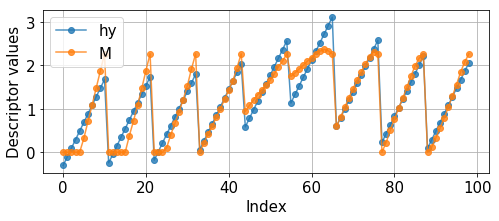

Constant descriptors ['x0'] are ignored in rij calculation.
          i         j       rij      rij2
0        x6  a(x6+x7)  0.828654  0.686668
1        x2  a(x2+x6)  0.798125  0.637003
2     a(x6)  a(x2+x6)  0.769225  0.591706
3  a(x6+x7)  a(x2+x6)  0.696992  0.485798
4        x7  a(x6+x7)  0.691738  0.478501
5        x2     a(x6)  0.677748  0.459343
6        x2  a(x6+x7)  0.675870  0.456801
7        x2        x7  0.651018  0.423824
8        x7     a(x6)  0.564727  0.318916
9        x7  a(x2+x6)  0.553170  0.305997

          i         j       nij      nij2
0        x0        x3  0.926543  0.858482
1     a(x6)  a(x2+x6)  0.903287  0.815928
2  a(x6+x7)  a(x2+x6)  0.853011  0.727629
3        x7  a(x6+x7)  0.849873  0.722284
4        x2  a(x2+x6)  0.846639  0.716798
5        x0        x1  0.845154  0.714286
6        x0     a(x6)  0.834343  0.696128
7        x7     a(x6)  0.825736  0.681840
8        x3        x7  0.805325  0.648548
9        x7  a(x2+x6)  0.797732  0.636376

       i      

In [10]:
# --- remove the strong near multicollinearity by removal of "a(x7)" ---
S1_lid.remove("a(x7)")
S1_lid.project("TRi2")
S1_lid.plot(S1_lid.y,S1_lid.hy)
S1_lid.corr(10)


In [11]:
S1_lid.save()

.save:  
  S1_lid ( 9 )  --->  S1_lid_save ( 10 )
  S1_lid ( 9 )         S1_lid_save ( 9 )



In [12]:
# --- generate 2nd order descriptors by direct product ---
S2_gen_dp = S1_lid.gen_dp(2,"S2_gen_dp")
S2_gen_dp.show()

Descriptor generation by direct product:
  Constant descriptors ['x0'] are ignored.
  # of generated new descriptors: 8H2 = 9C2 = 36
.gen_dp:  k=2
  S2_gen_dp ( 36 )  <---  S1_lid ( 8 )

.show: S2_gen_dp ( 36 )
  ['x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*x7', 'x1*a(x6)', 'x1*a(x6+x7)', 'x1*a(x2+x6)', 'x2*x2', 'x2*x3', 'x2*x6', 'x2*x7', 'x2*a(x6)', 'x2*a(x6+x7)', 'x2*a(x2+x6)', 'x3*x3', 'x3*x6', 'x3*x7', 'x3*a(x6)', 'x3*a(x6+x7)', 'x3*a(x2+x6)', 'x6*x6', 'x6*x7', 'x6*a(x6)', 'x6*a(x6+x7)', 'x6*a(x2+x6)', 'x7*x7', 'x7*a(x6)', 'x7*a(x6+x7)', 'x7*a(x2+x6)', 'a(x6)*a(x6)', 'a(x6)*a(x6+x7)', 'a(x6)*a(x2+x6)', 'a(x6+x7)*a(x6+x7)', 'a(x6+x7)*a(x2+x6)', 'a(x2+x6)*a(x2+x6)']
    1  x1*x1
    2  x1*x2
    3  x1*x3
    4  x1*x6
    5  x1*x7
    6  x1*a(x6)
    7  x1*a(x6+x7)
    8  x1*a(x2+x6)
    9  x2*x2
   10  x2*x3
   11  x2*x6
   12  x2*x7
   13  x2*a(x6)
   14  x2*a(x6+x7)
   15  x2*a(x2+x6)
   16  x3*x3
   17  x3*x6
   18  x3*x7
   19  x3*a(x6)
   20  x3*a(x6+x7)
   21  x3*a(x2+x6)
   22  x6

In [13]:
S2 = S1_lid.join(S2_gen_dp,"S2")
S2.show()

.join:  
  S2 (45)  <---  S1_lid ( 9 )   +   S2_gen_dp ( 36 )

.show: S2 ( 45 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*x7', 'x1*a(x6)', 'x1*a(x6+x7)', 'x1*a(x2+x6)', 'x2*x2', 'x2*x3', 'x2*x6', 'x2*x7', 'x2*a(x6)', 'x2*a(x6+x7)', 'x2*a(x2+x6)', 'x3*x3', 'x3*x6', 'x3*x7', 'x3*a(x6)', 'x3*a(x6+x7)', 'x3*a(x2+x6)', 'x6*x6', 'x6*x7', 'x6*a(x6)', 'x6*a(x6+x7)', 'x6*a(x2+x6)', 'x7*x7', 'x7*a(x6)', 'x7*a(x6+x7)', 'x7*a(x2+x6)', 'a(x6)*a(x6)', 'a(x6)*a(x6+x7)', 'a(x6)*a(x2+x6)', 'a(x6+x7)*a(x6+x7)', 'a(x6+x7)*a(x2+x6)', 'a(x2+x6)*a(x2+x6)']
    1  x0      (  =  const  )
    2  x1      (  =  x  )
    3  x2      (  =  MA  )
    4  x3      (  =  ZA  )
    5  x6      (  =  MAB  )
    6  x7      (  =  MBA  )
    7  a(x6)
    8  a(x6+x7)
    9  a(x2+x6)
   10  x1*x1
   11  x1*x2
   12  x1*x3
   13  x1*x6
   14  x1*x7
   15  x1*a(x6)
   16  x1*a(x6+x7)
   17  x1*a(x2+x6)
   18  x2*x2
   19  x2*x3
   20  x2*x6
   21  x2*x7
   22  

In [14]:
S2_lid = S2.lid("S2_lid")

Find and remove multicollinearities:
  normalize = False
  coefficients for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 45)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 1.2976544751935881e-17)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 18
                   rk_rref = 18
# of non-trivial solutions: 27 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 30, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Space index: [ extra basis, [ basis ] ]
[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 30]]

The form of multi-correlated descriptors
1 : x2*x2 = (-0.02)x0 + (2.559)x2 

Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  1.993206
  mse =  0.020133
  rmse =  0.141892
  R2 =  0.969035
  eq2 =  3.315366
  mseq =  0.033489
  rmseq =  0.182999
  Q2 =  0.948495

  TR2, TQ2, AIC =  0.990409,   0.984046,  -69.682357

    index        Label        b      |b|    p_val  -log10(p)       G2  \
0       7        a(x6)  0.19727  0.19727  0.71478    0.14583  0.00166   
1       9     a(x2+x6) -0.27725  0.27725  0.50043    0.30066  0.00562   
2      15     x1*a(x6)  0.13253  0.13253  0.88296    0.05406  0.00027   
3      18        x6*x6  0.27659  0.27659  0.39598    0.40232  0.00891   
4       5           x6  0.27489  0.27489  0.45852    0.33864  0.00680   
5      17  x1*a(x2+x6) -0.10001  0.10001  0.80852    0.09231  0.00073   
6      13        x1*x6  0.06644  0.06644  0.87960    0.05571  0.00028   
7       3           x2  0.61628  0.61628  0.15348    0.81396  0.02499   
8       1           x0 -0.36217  0.3

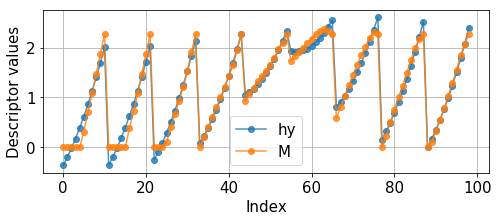

Constant descriptors ['x0'] are ignored in rij calculation.
          i            j       rij      rij2
0     a(x6)        x6*x6  0.972332  0.945430
1        x1        x1*x1  0.963143  0.927644
2        x6        x1*x6  0.838793  0.703573
3  x1*a(x6)  x1*a(x2+x6)  0.834892  0.697045
4        x6     a(x6+x7)  0.828654  0.686668
5     x1*x2  x1*a(x2+x6)  0.812685  0.660456
6        x2        x1*x2  0.801807  0.642895
7        x2     a(x2+x6)  0.798125  0.637003
8        x1        x1*x3  0.796322  0.634129
9     a(x6)     a(x2+x6)  0.769225  0.591706

             i            j       nij      nij2
0        a(x6)        x6*x6  0.975366  0.951338
1           x1        x1*x1  0.968616  0.938217
2           x1        x1*x3  0.926543  0.858482
3           x0           x3  0.926543  0.858482
4        a(x6)     a(x2+x6)  0.903287  0.815928
5     x1*a(x6)  x1*a(x2+x6)  0.903287  0.815928
6        x1*x1        x1*x3  0.897464  0.805442
7     a(x2+x6)        x6*x6  0.890536  0.793054
8  x1*a(x6+x

In [15]:
S2_lid.project("TRi2")
S2_lid.plot(S2_lid.y,S2_lid.hy)
S2_lid.corr(10)

In [ ]:
#S2_lid.remove("x6*x6")
#S2_lid.project("TRi2")
#S2_lid.corr(10)
#S2_lid.gik("x2*x2",10)

In [16]:
S2_lid.save()

.save:  
  S2_lid ( 18 )  --->  S2_lid_save ( 18 )
  S2_lid ( 18 )         S2_lid_save ( 18 )



In [17]:
# --- generate 2nd order descriptors by direct product ---
S3_gen_dp = S1_lid.gen_dp(3,"S3_gen_dp")

# !!! === Caution ===
# !!!  Not  S3_gen_dp = S2_lid.gen_dp(3,"S3_dp")  !!!
# ===============

Descriptor generation by direct product:
  Constant descriptors ['x0'] are ignored.
  # of generated new descriptors: 8H3 = 10C3 = 120
.gen_dp:  k=3
  S3_gen_dp ( 120 )  <---  S1_lid ( 8 )



In [18]:
S3 = S2_lid.join(S3_gen_dp)
S3.show()

.join:  
  S_join (138)  <---  S2_lid ( 18 )   +   S3_gen_dp ( 120 )

.show: S_join ( 138 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*x7', 'x1*a(x6)', 'x1*a(x6+x7)', 'x1*a(x2+x6)', 'x6*x6', 'x1*x1*x1', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*x7', 'x1*x1*a(x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x2+x6)', 'x1*x2*x2', 'x1*x2*x3', 'x1*x2*x6', 'x1*x2*x7', 'x1*x2*a(x6)', 'x1*x2*a(x6+x7)', 'x1*x2*a(x2+x6)', 'x1*x3*x3', 'x1*x3*x6', 'x1*x3*x7', 'x1*x3*a(x6)', 'x1*x3*a(x6+x7)', 'x1*x3*a(x2+x6)', 'x1*x6*x6', 'x1*x6*x7', 'x1*x6*a(x6)', 'x1*x6*a(x6+x7)', 'x1*x6*a(x2+x6)', 'x1*x7*x7', 'x1*x7*a(x6)', 'x1*x7*a(x6+x7)', 'x1*x7*a(x2+x6)', 'x1*a(x6)*a(x6)', 'x1*a(x6)*a(x6+x7)', 'x1*a(x6)*a(x2+x6)', 'x1*a(x6+x7)*a(x6+x7)', 'x1*a(x6+x7)*a(x2+x6)', 'x1*a(x2+x6)*a(x2+x6)', 'x2*x2*x2', 'x2*x2*x3', 'x2*x2*x6', 'x2*x2*x7', 'x2*x2*a(x6)', 'x2*x2*a(x6+x7)', 'x2*x2*a(x2+x6)', 'x2*x3*x3', 'x2*x3*x6', 'x2*x3*x7', 'x2*x3*a(x6)', 'x2*x3*a(x6+x7)', 'x2*x

In [19]:
S3_lid = S3.lid("S3_lid")

Find and remove multicollinearities:
  normalize = False
  coefficients for descriptors with original scale (to obtain exact MCL relationships)

Shape: X (99, 138)
1/sqrt(m) = 0.10050378152592121
tole1 is given automatically.
tole2 is given automatically.
tole1, tole2 = 0.001005037815259212, 1.0050378152592119e-05

X is a rank deficient matrix ( pivot ( = 2.9120096039975655e-16)  <  tole2 ( = 1.0050378152592119e-05) )
Rank check: rk_np   = 27
                   rk_rref = 27
# of non-trivial solutions: 111 (= n - rk_rref)
Column order:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 11

Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  0.198525
  mse =  0.002005
  rmse =  0.044781
  R2 =  0.996916
  eq2 =  0.468188
  mseq =  0.004729
  rmseq =  0.068769
  Q2 =  0.992727

  TR2, TQ2, AIC =  0.999045,   0.997747,  -280.034296

    index           Label        b      |b|    p_val  -log10(p)       G2  \
0      15        x1*a(x6)  1.18308  1.18308  0.29457    0.53082  0.01525   
1      24     x1*x1*a(x6) -1.03735  1.03735  0.33805    0.47102  0.01275   
2      17     x1*a(x2+x6) -0.22534  0.22534  0.71709    0.14443  0.00183   
3      13           x1*x6  0.36953  0.36953  0.54742    0.26168  0.00505   
4      18           x6*x6  0.25186  0.25186  0.21871    0.66014  0.02094   
5      27        x1*x6*x6  0.04946  0.04946  0.88577    0.05268  0.00029   
6      26  x1*x1*a(x2+x6)  0.07504  0.07504  0.87946    0.05579  0.00032   
7       9        a(x2+x6) -0.24085  0.24085  0.30646    0.51363  0.01452   
8      2

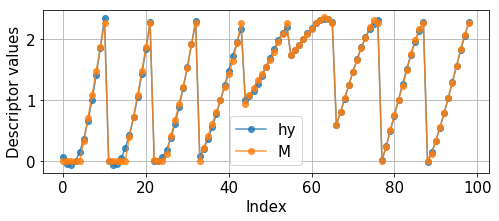

Constant descriptors ['x0'] are ignored in rij calculation.
             i               j       rij      rij2
0        x1*x1        x1*x1*x1  0.985849  0.971899
1        a(x6)           x6*x6  0.972332  0.945430
2     x1*a(x6)        x1*x6*x6  0.968292  0.937589
3        x1*x6        x1*x1*x6  0.967956  0.936939
4        x1*x2        x1*x1*x2  0.964722  0.930689
5           x1           x1*x1  0.963143  0.927644
6  x1*a(x6+x7)  x1*x1*a(x6+x7)  0.961549  0.924577
7        x1*x7        x1*x1*x7  0.960747  0.923034
8  x1*a(x2+x6)  x1*x1*a(x2+x6)  0.960662  0.922872
9     x1*a(x6)     x1*x1*a(x6)  0.958866  0.919424

             i               j       nij      nij2
0        x1*x1        x1*x1*x1  0.986387  0.972959
1        a(x6)           x6*x6  0.975366  0.951338
2     x1*a(x6)        x1*x6*x6  0.975366  0.951338
3           x1           x1*x1  0.968616  0.938217
4  x1*a(x2+x6)  x1*x1*a(x2+x6)  0.968616  0.938217
5        x1*x7        x1*x1*x7  0.968616  0.938217
6        x1*x2       

In [20]:
S3_lid.project("TRi2")
S3_lid.plot(S3_lid.y,S3_lid.hy)
S3_lid.corr(10)

In [21]:
# --- take into account only the 2nd order for x1 and the first order for other descriptors for just simplification ---
S3_lid.remove(["x1*x1*x1","x6*x6","x1*x6*x6"])
S3_lid.save()


.remove:  None
  S3_lid ( 27 )   -   S3_lid ( 3 )
  S3_lid ( 24 )

.save:  
  S3_lid ( 24 )  --->  S3_lid_save ( 27 )
  S3_lid ( 24 )         S3_lid_save ( 24 )



In [22]:
S3_lid.show()

.show: S3_lid ( 24 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x2+x6)', 'x1*x1', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*x7', 'x1*a(x6)', 'x1*a(x6+x7)', 'x1*a(x2+x6)', 'x1*x1*x2', 'x1*x1*x3', 'x1*x1*x6', 'x1*x1*x7', 'x1*x1*a(x6)', 'x1*x1*a(x6+x7)', 'x1*x1*a(x2+x6)']
    1  x0      (  =  const  )
    2  x1      (  =  x  )
    3  x2      (  =  MA  )
    4  x3      (  =  ZA  )
    5  x6      (  =  MAB  )
    6  x7      (  =  MBA  )
    7  a(x6)
    8  a(x6+x7)
    9  a(x2+x6)
   10  x1*x1
   11  x1*x2
   12  x1*x3
   13  x1*x6
   14  x1*x7
   15  x1*a(x6)
   16  x1*a(x6+x7)
   17  x1*a(x2+x6)
   18  x1*x1*x2
   19  x1*x1*x3
   20  x1*x1*x6
   21  x1*x1*x7
   22  x1*x1*a(x6)
   23  x1*x1*a(x6+x7)
   24  x1*x1*a(x2+x6)



In [23]:
# --- basis transformations ---
S3_lid.add("x1*(1.-x1)")
S3_lid.remove("x1*x1")

S3_lid.add("x1*(1.-x1)*x2")
S3_lid.remove("x1*x1*x2")

S3_lid.add("x1*(1.-x1)*x3")
S3_lid.remove("x1*x1*x3")

S3_lid.add("x1*(1.-x1)*x6")
S3_lid.remove("x1*x1*x6")

S3_lid.add("x1*(1.-x1)*x7")
S3_lid.remove("x1*x1*x7")

S3_lid.add("x1*(1.-x1)*a(x6)")
S3_lid.remove("x1*x1*a(x6)")

S3_lid.add("x1*(1.-x1)*a(x6+x7)")
S3_lid.remove("x1*x1*a(x6+x7)")

S3_lid.add("x1*(1.-x1)*a(x2+x6)")
S3_lid.remove("x1*x1*a(x2+x6)")

.add:  ['x1*(1.-x1)']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*x2']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*x2
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*x3']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*x3
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*x6']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*x6
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*x7']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*x7
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*a(x6)']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*a(x6)
  S3_lid ( 25 )   -   S3_lid ( 1 )
  S3_lid ( 24 )

.add:  ['x1*(1.-x1)*a(x6+x7)']
  S3_lid ( 24 )   +   new ( 1 ) 
  S3_lid ( 25 )

.remove:  x1*x1*a(x6+x7)
  S3_lid ( 25 )   

In [24]:
S3_lid.save()
S3_lid.show()

.save:  
  S3_lid ( 24 )  --->  S3_lid_save ( 24 )
  S3_lid ( 24 )         S3_lid_save ( 24 )

.show: S3_lid ( 24 )
  ['x0', 'x1', 'x2', 'x3', 'x6', 'x7', 'a(x6)', 'a(x6+x7)', 'a(x2+x6)', 'x1*x2', 'x1*x3', 'x1*x6', 'x1*x7', 'x1*a(x6)', 'x1*a(x6+x7)', 'x1*a(x2+x6)', 'x1*(1.-x1)', 'x1*(1.-x1)*x2', 'x1*(1.-x1)*x3', 'x1*(1.-x1)*x6', 'x1*(1.-x1)*x7', 'x1*(1.-x1)*a(x6)', 'x1*(1.-x1)*a(x6+x7)', 'x1*(1.-x1)*a(x2+x6)']
    1  x0      (  =  const  )
    2  x1      (  =  x  )
    3  x2      (  =  MA  )
    4  x3      (  =  ZA  )
    5  x6      (  =  MAB  )
    6  x7      (  =  MBA  )
    7  a(x6)
    8  a(x6+x7)
    9  a(x2+x6)
   10  x1*x2
   11  x1*x3
   12  x1*x6
   13  x1*x7
   14  x1*a(x6)
   15  x1*a(x6+x7)
   16  x1*a(x2+x6)
   17  x1*(1.-x1)
   18  x1*(1.-x1)*x2
   19  x1*(1.-x1)*x3
   20  x1*(1.-x1)*x6
   21  x1*(1.-x1)*x7
   22  x1*(1.-x1)*a(x6)
   23  x1*(1.-x1)*a(x6+x7)
   24  x1*(1.-x1)*a(x2+x6)



Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  0.286976
  mse =  0.002899
  rmse =  0.053840
  R2 =  0.995542
  eq2 =  0.575993
  mseq =  0.005818
  rmseq =  0.076277
  Q2 =  0.991052

  TR2, TQ2, AIC =  0.998619,   0.997228,  -249.554303

    index                Label        b      |b|    p_val  -log10(p)       G2  \
0       2                   x1  2.35732  2.35732  0.00000   35.86250  0.88234   
1      17           x1*(1.-x1) -4.65213  4.65213  0.00000   20.29650  0.69495   
2      19        x1*(1.-x1)*x3  0.35150  0.35150  0.00000   14.07438  0.55430   
3       3                   x2  1.00875  1.00875  0.00000   12.76589  0.51744   
4      10                x1*x2 -1.03206  1.03206  0.00000    9.65501  0.41745   
5      21        x1*(1.-x1)*x7  0.48948  0.48948  0.00198    2.70284  0.12049   
6      13                x1*x7 -0.07727  0.07727  0.07402    1.13063  0.04193   
7       6                   x7  0.04688  0.0

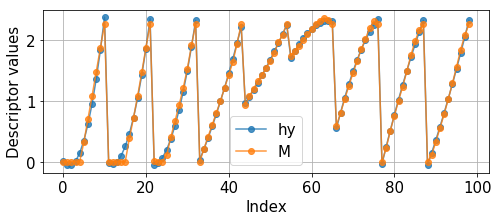

Constant descriptors ['x0'] are ignored in rij calculation.
                  i                    j       rij      rij2
0                x6        x1*(1.-x1)*x6  0.855877  0.732525
1                x6                x1*x6  0.838793  0.703573
2          x1*a(x6)          x1*a(x2+x6)  0.834892  0.697045
3  x1*(1.-x1)*a(x6)  x1*(1.-x1)*a(x2+x6)  0.830119  0.689098
4                x6             a(x6+x7)  0.828654  0.686668
5                x2        x1*(1.-x1)*x2  0.821606  0.675036
6             x1*x2          x1*a(x2+x6)  0.812685  0.660456
7     x1*(1.-x1)*x2  x1*(1.-x1)*a(x2+x6)  0.811196  0.658038
8                x2                x1*x2  0.801807  0.642895
9                x2             a(x2+x6)  0.798125  0.637003

                  i                    j       nij      nij2
0        x1*(1.-x1)        x1*(1.-x1)*x3  0.926543  0.858482
1                x1                x1*x3  0.926543  0.858482
2                x0                   x3  0.926543  0.858482
3             a(x6)     

In [25]:
S3_lid.project("G2")
S3_lid.plot(S3_lid.y,S3_lid.hy)
S3_lid.corr(10)


In [38]:
# --- perform a backword selection ---
#   Delete the descriptor that has the smallestt importance G2,
#   and whose removal increase Q2 (and TQ2, AIC) the most and decrease R2 (and TR2) the least.
#   Repeat this process until no further descriptors can be deleted withdout reducing Q2.

# full model                                         TR2, TQ2, AIC =  0.998619,   0.997228,  -249.554303
S3_lid.remove("x6")                           # TR2, TQ2, AIC =  0.998619,   0.997330,  -251.546143
S3_lid.remove("x1*x3")                      # TR2, TQ2, AIC =  0.998618,   0.997518,  -253.506009
S3_lid.remove("x1*(1.-x1)*a(x2+x6)") # TR2, TQ2, AIC =  0.998618,   0.997664,  -255.444476
S3_lid.remove("a(x2+x6)")                 # TR2, TQ2, AIC =  0.998613,   0.997715,  -257.154284
S3_lid.remove("a(x6)")                       # TR2, TQ2, AIC =  0.998609,   0.997780,  -258.857741
S3_lid.remove("x0")                          # TR2, TQ2, AIC =  0.998606,   0.997842,  -260.618326
S3_lid.remove("x1*a(x6)")                 # TR2, TQ2, AIC =  0.998599,   0.997913,  -262.099708
S3_lid.remove("x1*x6")                     # TR2, TQ2, AIC =  0.998591,   0.998003,  -263.593142
S3_lid.remove("x3")                          # TR2, TQ2, AIC =  0.998556,   0.997991,  -263.152184
S3_lid.remove("x7")                          # TR2, TQ2, AIC =  0.998538,   0.997987,  -263.885239
S3_lid.remove("x1*a(x2+x6)")            # TR2, TQ2, AIC =  0.998495,   0.998001,  -263.019265
S3_lid.remove("x1*(1.-x1)*a(x6+x7)") # TR2, TQ2, AIC =  0.998454,   0.998022,  -262.371142

S3_lid.remove("x1*(1.-x1)*x6")            # TR2, TQ2, AIC =  0.998414,   0.997977,  -261.866235
#S3_lid.remove("")            #
#S3_lid.remove("")            #
#S3_lid.remove("")            #


S3_lid.project("G2")

.remove:  x6
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*x3
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*(1.-x1)*a(x2+x6)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  a(x2+x6)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  a(x6)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x0
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*a(x6)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*x6
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x3
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x7
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*a(x2+x6)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*(1.-x1)*a(x6+x7)
  S3_lid ( 12 )   -   S3_lid ( 0 )
  S3_lid ( 12 )

.remove:  x1*(1.-x1)*x6
  S3_lid ( 12 )   -   S3_lid ( 1 )
  S3_lid ( 11 )

Ordinary Least Squares regression:
  normalize = False
  coefficients for descri

.load:  all
  S3_lid ( 24 )   +   S3_lid_save ( 24 )   in   S3_lid_save ( 24 )
  S3_lid ( 24 )        S3_lid_save ( 24 )

Elastic net calculation (by sklearn)
Constant descriptors ['x0'] are ignored.


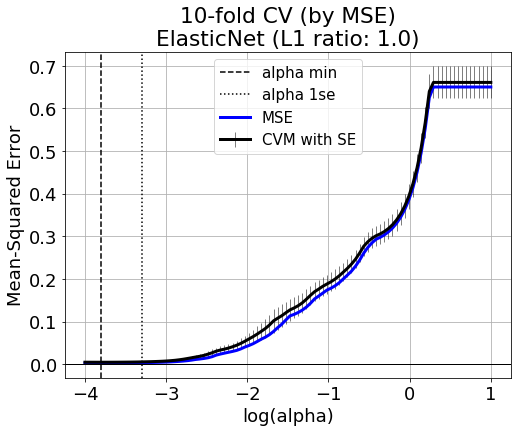

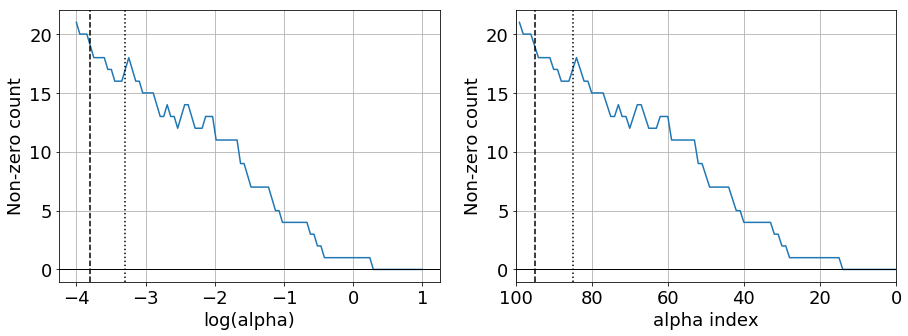

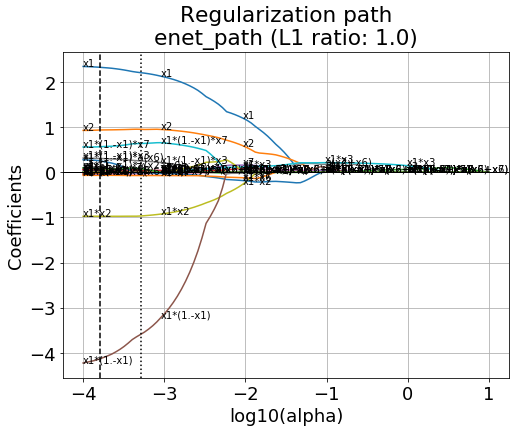

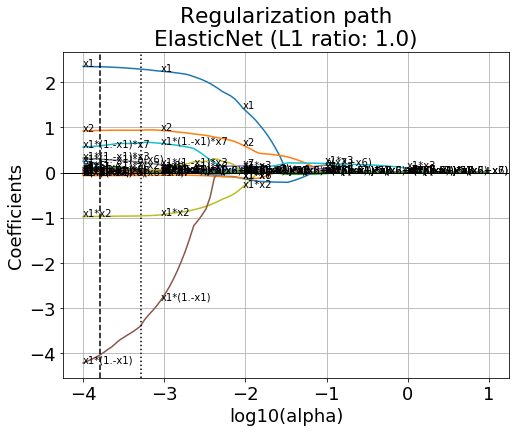

            Value
R2       0.994235
MSE      0.003748
CV mean  0.005644
CV std   0.003836

                  Label         b       |b|
1                 const -0.101608  0.101608
2                    x1  2.287017  2.287017
3                    x2  0.937021  0.937021
4                    x3  0.005073  0.005073
5                    x6  0.024588  0.024588
6                    x7  0.020850  0.020850
7                 a(x6)  0.075340  0.075340
8              a(x6+x7) -0.028581  0.028581
9              a(x2+x6)  0.005079  0.005079
10                x1*x2 -0.959551  0.959551
11                x1*x3  0.009796  0.009796
12                x1*x6  0.000000  0.000000
13                x1*x7 -0.065095  0.065095
14             x1*a(x6) -0.000000  0.000000
15          x1*a(x6+x7)  0.040064  0.040064
16          x1*a(x2+x6) -0.015512  0.015512
17           x1*(1.-x1) -3.396171  3.396171
18        x1*(1.-x1)*x2  0.000000  0.000000
19        x1*(1.-x1)*x3  0.229964  0.229964
20        x1*(1.-x1)*x6  0.00

In [42]:
# --- Elastic net calculation by sklearn ---
S3_lid.load()
S3_lid.enet(almax=1,almin=-4,l1r=1.0,nf=10,intercept=True)

.remove:  None
  S3_lid ( 15 )   -   S3_lid ( 0 )
  S3_lid ( 15 )

.remove:  None
  S3_lid ( 15 )   -   S3_lid ( 0 )
  S3_lid ( 15 )

.remove:  None
  S3_lid ( 15 )   -   S3_lid ( 0 )
  S3_lid ( 15 )

Elastic net calculation (by sklearn)
Constant descriptors ['x0'] are ignored.


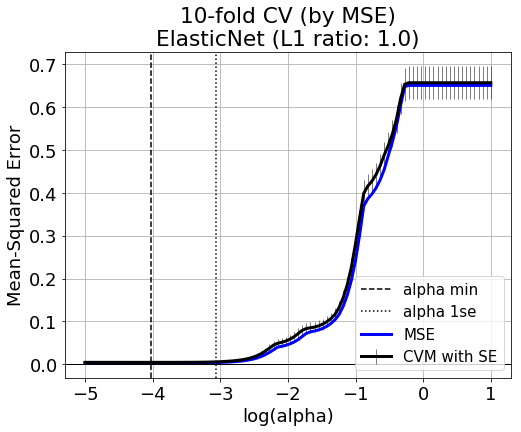

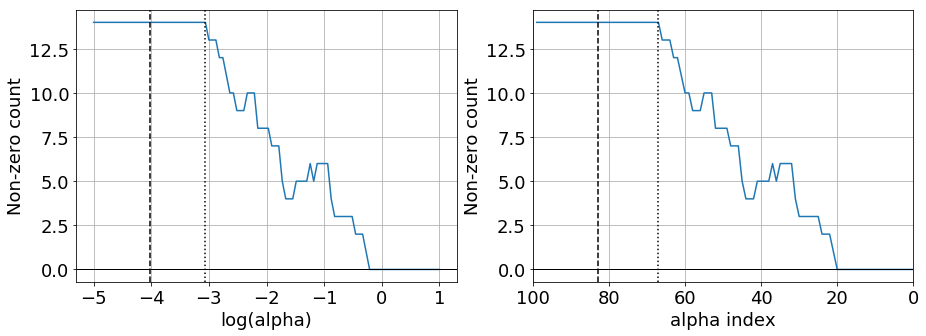

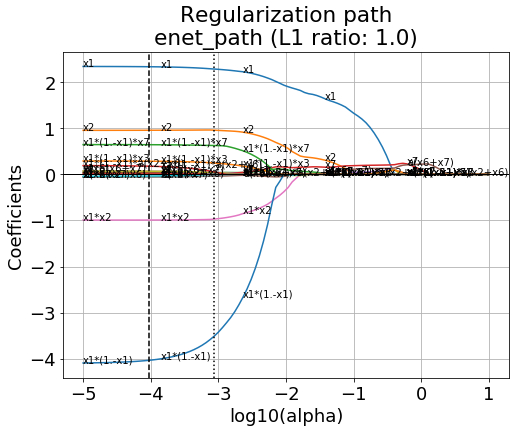

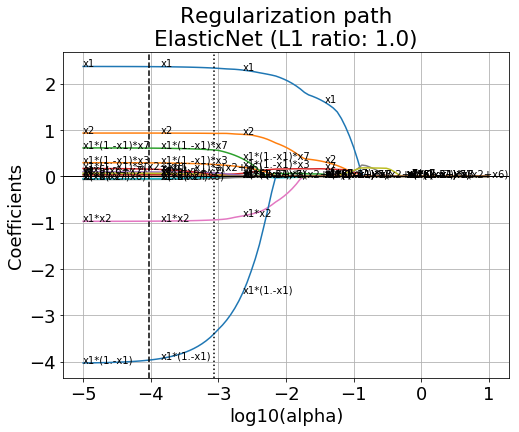

            Value
R2       0.993557
MSE      0.004189
CV mean  0.005850
CV std   0.005607

                  Label         b       |b|
1                 const -0.075060  0.075060
2                    x1  2.335646  2.335646
3                    x2  0.927042  0.927042
4                    x6  0.036226  0.036226
5                    x7  0.034939  0.034939
6                 a(x6)  0.074857  0.074857
7              a(x6+x7) -0.028436  0.028436
8                 x1*x2 -0.939756  0.939756
9                 x1*x7 -0.047085  0.047085
10          x1*a(x6+x7)  0.034751  0.034751
11          x1*a(x2+x6) -0.017517  0.017517
12           x1*(1.-x1) -3.393882  3.393882
13        x1*(1.-x1)*x3  0.255074  0.255074
14        x1*(1.-x1)*x7  0.568725  0.568725
15  x1*(1.-x1)*a(x2+x6)  0.018918  0.018918

yp_skl = (-0.075)const + (2.336)x1 + (0.927)x2 + (0.036)x6 + (0.035)x7 + (0.075)a(x6) + (-0.028)a(x6+x7) + (-0.94)x1*x2 + (-0.047)x1*x7 + (0.035)x1*a(x6+x7) + (-0.018)x1*a(x2+x6) + (-3.394)x1*(1.-x1) + (0

In [47]:
# --- remove descriptors which have almost 0 (less than 0.01) coefficient ---
S3_lid.remove(["x1*x6","x1*a(x6)"])
S3_lid.remove(["x1*(1.-x1)*x2","x1*(1.-x1)*x6","x1*(1.-x1)*a(x6)","x1*(1.-x1)*a(x6+x7)"])
S3_lid.remove(["x3","a(x2+x6)","x1*x3"])
S3_lid.enet(almax=1,almin=-5,l1r=1.0,nf=10,intercept=True)

In [48]:
S3_lid.project()

Ordinary Least Squares regression:
  normalize = False
  coefficients for descriptors with original scale

  e2 =  0.320653
  mse =  0.003239
  rmse =  0.056912
  R2 =  0.995019
  eq2 =  0.434747
  mseq =  0.004391
  rmseq =  0.066268
  Q2 =  0.993246

  TR2, TQ2, AIC =  0.998457,   0.997908,  -256.569178

                  Label        b      |b|    p_val  -log10(p)       G2  \
1                    x0 -0.04296  0.04296  0.13868    0.85800  0.02592   
2                    x1  2.37146  2.37146  0.00000   75.18461  0.98282   
3                    x2  0.93386  0.93386  0.00000   32.91128  0.82594   
4                    x6  0.03979  0.03979  0.15466    0.81061  0.02397   
5                    x7  0.03050  0.03050  0.10702    0.97052  0.03063   
6                 a(x6)  0.09620  0.09620  0.05051    1.29662  0.04477   
7              a(x6+x7) -0.05172  0.05172  0.00361    2.44272  0.09647   
8                 x1*x2 -0.97096  0.97096  0.00000   26.56954  0.75383   
9                 x1*x7 -0